In [146]:
# want to look at segments with ratios >1
# find out what tracers, look at UT and BL distributions 
# date created: 3/26/2020
# author: sofia chelpon
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [147]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares
import scipy

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [390]:
# load in both toga and awas data pickles 
utbl_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/utbl_allseg_campavgbl.pkl")
tau_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/tau_allseg_campavgbl.pkl")
seginfo_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/segment_info_campavgbl.pkl")
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/trcnames_allseg.pkl")

toga_seg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/toga_segments.pkl")
awas_seg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/awas_segments.pkl")

awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")

In [149]:
##########################################################################################
########## find which tracers are > 0.9 
vsl = np.where(tau_allseg < 100)
col = list(tau_allseg)

seg_with_gt = [] #identify segments that have high ratios
gtcount_perseg = [] #count the number of high ratios per segment 
gt_utbl = pd.DataFrame() #the UTBL of high ratios 
gt_tracers = pd.DataFrame() #the names of tracers with high ratios 

# iterate through each segment 
for i in col:
    vsl_idx = np.where(tau_allseg[i] < 100)
    gt_idx = np.where(utbl_allseg[i].loc[vsl_idx] > 0.9)
    if (np.size(gt_idx) > 0):
        # segment info 
        seg_with_gt.append(i)
        # count of >0.9 per segment 
        gtcount_perseg.append(np.size(gt_idx))
        # tracer names of those with >0.9
        tracers = trcnames_allseg[i].loc[gt_idx]
        diffa = 52 - len(tracers)
        if (diffa > 0):
            filla = np.empty((1,diffa))
            filla.fill(np.nan)
            tracers = np.append(tracers, filla)
        gt_tracers[i] = tracers

gt_seginfo = seginfo_allseg.iloc[seg_with_gt]
gt_seginfo['Num. gt Per Seg'] = gtcount_perseg

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
##########################################################################################

(0, 1)

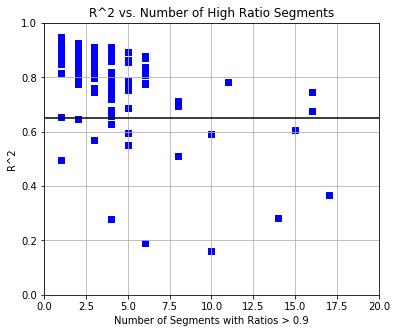

In [154]:
####### plot relationship between r^2 and number of high r^2 segments 
fig = plt.figure(figsize=(6, 5))
plt.scatter(gt_seginfo['Num. gt Per Seg'], gt_seginfo['r squared'], marker = 's', color = 'b')

plt.plot([0, 20], [0.65, 0.65], 'k')
plt.xlim([0, 20])
plt.grid(which = 'major')
plt.title('R^2 vs. Number of High Ratio Segments')
plt.xlabel('Number of Segments with Ratios > 0.9')
plt.ylabel('R^2')
plt.ylim([0, 1])
# linear fit 
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gt_seginfo['Num. gt Per Seg'], gt_seginfo['r squared'])
#f = []
#for x in [0, 20]:
    #f.append(slope*x+intercept)
#plt.plot([0, 20], f, 'b', linewidth = 2)

In [ ]:
##########################################################################################

In [159]:
# reshape, trim tracers 
gt_tracers = gt_tracers.transpose()
col = list(gt_tracers)
for i in col:
    if (gt_tracers[i].isna().sum() == len(gt_tracers)):
        del gt_tracers[i]

In [174]:
# tracer names that have the high ratios 
gt_tracers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CHBrCl2_Bromodichloromethane,CH2Br2_Methylene_bromide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CH2Br2_Methylene_bromide,Dibromomethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CH2Br2_Methylene_bromide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CHBr3_Bromoform,CH2Br2_Methylene_bromide,Dibromomethane,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CHBr3_Bromoform,CHBrCl2_Bromodichloromethane,CH2Br2_Methylene_bromide,Dibromomethane,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,CHBrCl2_Bromodichloromethane,Dibromomethane,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,CHBrCl2_Bromodichloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,CHBrCl2_Bromodichloromethane,Dibromomethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
# list of all tracers, not separated by segment 
alltracers = []
col = list(gt_tracers)
for i in col:
    trc = gt_tracers[i].values
    for i in trc:
        if (type(i) == str):
            alltracers.append(i)

In [276]:
# function to get unique values 
def unique(list1):  
    # intilize a null list 
    unique_list = []     
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return(unique_list)
    # print list 
    #for x in unique_list: 
        #print(x)

In [708]:
# find unique in list 
unq = unique(alltracers)
trc_gt = pd.DataFrame()
trc_gt['Tracer'] = unq

# identify which instrument 
awas = list(awas_df)
toga = list(toga_df)
inst_gt = []
cnt = []
for tt in unq:
    if tt in awas:
        inst_gt.append('AWAS')
    if tt in toga:
        inst_gt.append('TOGA')
    # count how many times each tracer appears in list 
    cnt.append(alltracers.count(tt))
    
trc_gt['Instrument'] = inst_gt
trc_gt['Count'] = cnt

trc_gt = trc_gt.sort_values('Count', ascending = False)
trc_gt = trc_gt.reset_index(drop = True)

In [709]:
# load lifetimes 
mypath1 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_lifetimes_12162019.xlsx'
toga_lifetimes = pd.read_excel(mypath1)
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_lifetimes_12162019.xlsx'
awas_lifetimes = pd.read_excel(mypath2)

# get liftime for each species 
lifetimes = []
for index, row in trc_gt.iterrows():
    tname = row.Tracer
    if row.Instrument == 'TOGA':
        tau = toga_lifetimes[toga_lifetimes['Trace_Gas'] == tname]
        bltau = str(np.round(tau['BL_tau'].values, 2))
        lifetimes.append(bltau[1:-1])  
    else:
        tau = awas_lifetimes[awas_lifetimes['Trace_Gas'] == tname]
        bltau = str(np.round(tau['BL_tau'].values, 2))
        lifetimes.append(bltau[1:-1])   

# add to dataframe 
trc_gt['Lifetime'] = lifetimes
trc_gt['Lifetime'].iloc[7] = 15.07
trc_gt

,Tracer,Instrument,Count,Lifetime
0,Dibromomethane,TOGA,133,39.13
1,CHBrCl2_Bromodichloromethane,AWAS,63,27.46
2,CH2Br2_Methylene_bromide,AWAS,57,39.13
3,CH2BrCl_Bromochloromethane,AWAS,56,45.19
4,CHBr2Cl_Dibromochloromethane,AWAS,50,13.37
5,C2H5ONO2_Ethyl_nitrate,AWAS,44,12.35
6,CHBr3_Bromoform,AWAS,21,15.07
7,Bromoform,TOGA,18,15.07
8,C2H4Cl2_1_2_Dichloroethane,AWAS,16,19.
9,CH2Cl2_Methylene_chloride,AWAS,15,45.87


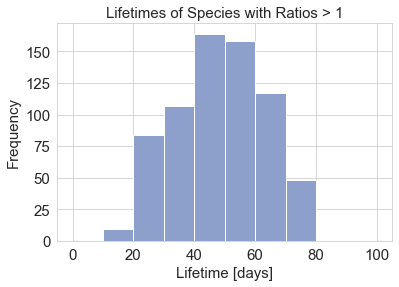

In [722]:
# plot lifetime distribution 
inc = 10
bins = np.arange(0, 100+inc, inc)
centers = bins[0:-1] + inc/2

taustr = trc_gt['Lifetime'].values
tau = []
for i in taustr:
    #print(i)
    tau.append(float(i))
    
trc_gt['Lifetime'] = tau

# bins 
bin_tau = pd.cut(tau, bins).value_counts()
plt.bar(centers, binned_lt.values, width = inc, color = c, label = 'UT < BL')
    
plt.title('Lifetimes of Species with Ratios > 1',  fontsize = 15)
plt.xlabel('Lifetime [days]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.tick_params(axis='both', labelsize=15)

In [721]:
##########################################################################################
##########################################################################################

In [632]:
def plot_utbldist(trc_idx): 
    #######################################################################
    # ---------- choose tracer 
    tt = trc_gt['Tracer'][i]
    inst = trc_gt['Instrument'][i]

    # dataframe for that tracer 
    trcdf = pd.DataFrame

    if inst == 'AWAS':
        trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
    if inst == 'TOGA':
        trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]

    trcdf_utbl = trcdf[(trcdf['GGALT'] > 12000) & (trcdf['GGALT'] < 14000) | (trcdf['GGALT'] < 2000)]
    #trcdf_bl = trcdf[trcdf['GGALT'] < 2000]

    where = []
    for ii in trcdf_utbl['GGALT']:
        if (ii < 2000):
            w = 'BL'
        else: 
            w = 'UT'
        where.append(w)
    trcdf_utbl['Level'] = where
    trcdf_utbl
    #######################################################################
    # ------------ plot 
    fig, ax = plt.subplots(ncols = 2, figsize = (9, 5))

    # ut/bl, get bl mean 
    bl = trcdf_utbl[trcdf_utbl['Level'] == 'BL']
    ut = trcdf_utbl[trcdf_utbl['Level'] == 'UT']
    blmean = bl[tt].mean()

    # colors 
    c = sns.color_palette("Set2")[2]
    d = sns.color_palette("Set1")[1]
    e = sns.color_palette("Set1")[0]

    # ----------------------- subplot 1 - boxplot in UT/BL 
    capprops = dict(linestyle='-', linewidth=3, color=c)
    medianprops = dict(linestyle='-', linewidth=3, color=c)
    boxprops = dict(linestyle='-', linewidth=3, color=c)
    meanprops = dict(marker='x', markeredgecolor='k', markersize=12, markeredgewidth=3)
    whiskerprops = dict(linestyle='-',linewidth=3.0, color=c)
    flierprops = dict(marker='^', markerfacecolor = c, markersize=6)

    trcdf_utbl.boxplot(column = tt, by = 'Level', showmeans = True, showfliers=True,
                       boxprops=boxprops, medianprops=medianprops,
                       meanprops=meanprops, flierprops=flierprops, 
                       whiskerprops=whiskerprops, capprops = capprops,
                       fontsize = 15, figsize=(4,5), widths = (0.9, 0.9), ax = ax[0])   

    ax[0].set_title(tt, fontsize = 15)
    ax[0].set_ylabel('[pptv]', fontsize = 15)
    ax[0].set_xlabel('Level', fontsize = 15)
    fig.suptitle('')

    ax[0].plot([0, 3], [blmean, blmean], color = 'k', linestyle = ':')
    ax[0].set_xlim([0, 3])

    # -------------------- subplot 2 - histogram showing fraction > BL mean 
    # find where > or < BL mean 
    gtbl = []
    thist = ut[tt].values
    for jj in thist:
        if (jj < blmean):
            gtbl.append('False')
        else: 
            gtbl.append('True')

    ut['UT > BL'] = gtbl

    # plot
    inc = (np.nanmax(ut[tt]) - np.nanmin(ut[tt]))/10
    bins = np.arange(np.nanmin(ut[tt]), np.nanmax(ut[tt])+inc, inc)
    centers = bins[0:-1] + inc/2

    utlt = ut[ut['UT > BL'] == 'False']
    utgt = ut[ut['UT > BL'] == 'True']

    binned_lt = pd.cut(utlt[tt], bins).value_counts(sort = False)
    binned_gt = pd.cut(utgt[tt], bins).value_counts(sort = False)

    plt.bar(centers, binned_lt.values, width = inc, color = c, label = 'UT < BL')
    plt.bar(centers, binned_gt.values, width = inc, color = e, label = 'UT > BL')
    plt.legend(fontsize = 12)
    plt.title(tt + ' UT Samples',  fontsize = 15)
    plt.xlabel('[pptv]', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.tick_params(axis='both', labelsize=15)
    ymax = np.max([np.max(binned_lt.values), np.max(binned_gt.values)])
    plt.plot([blmean, blmean], [0, ymax], color = 'k', linestyle = ':')
    
    # save 
    svname = str(trc_idx) + '_' + str(tt) + '_UTBL_dist' 
    fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/gt1_utbldist/' + svname)  


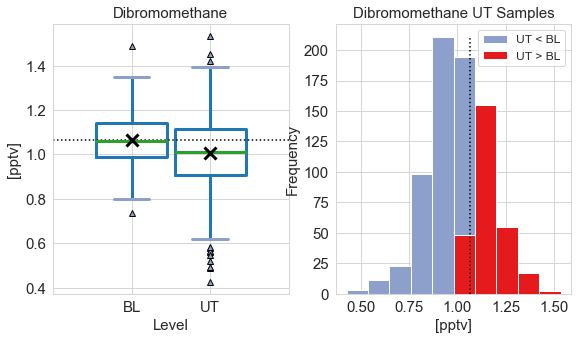

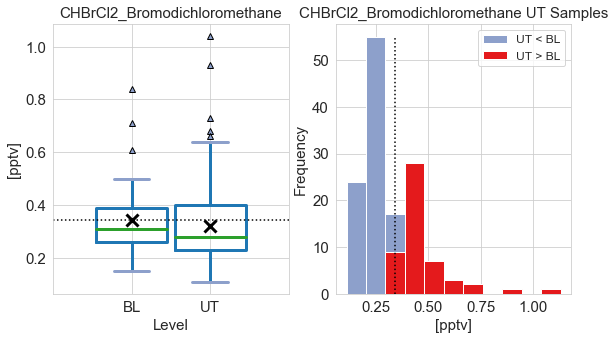

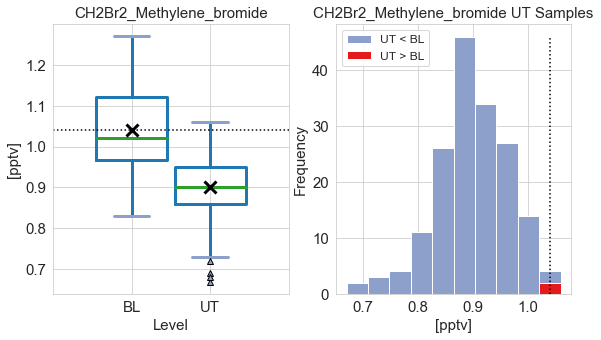

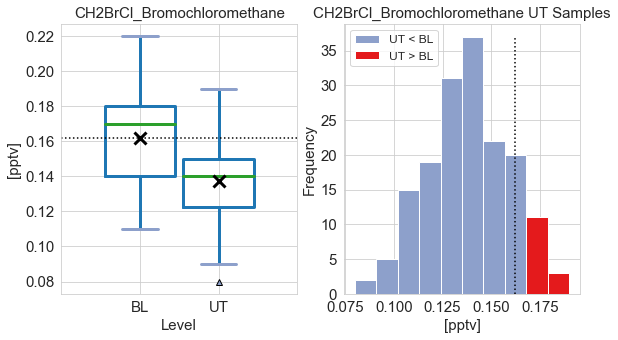

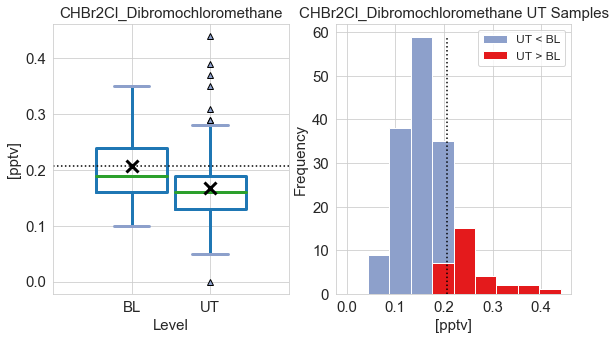

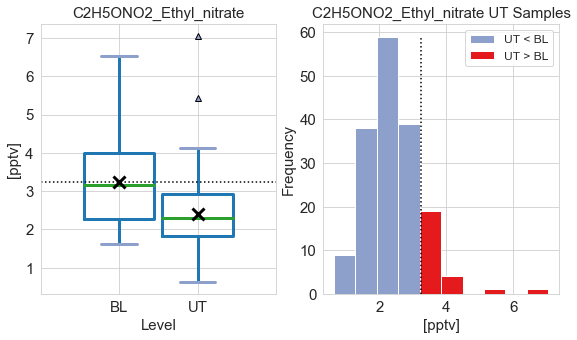

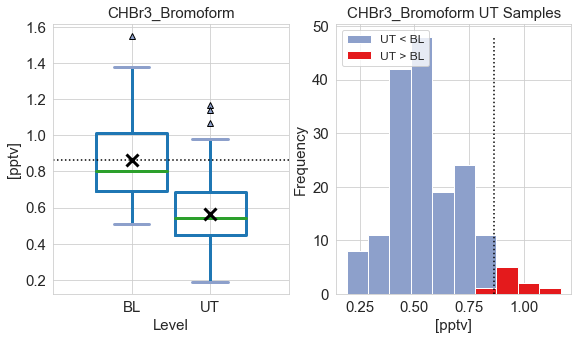

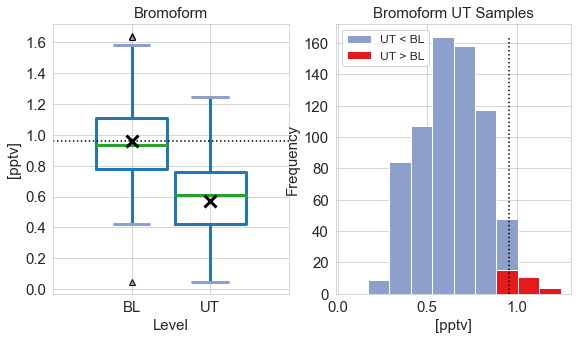

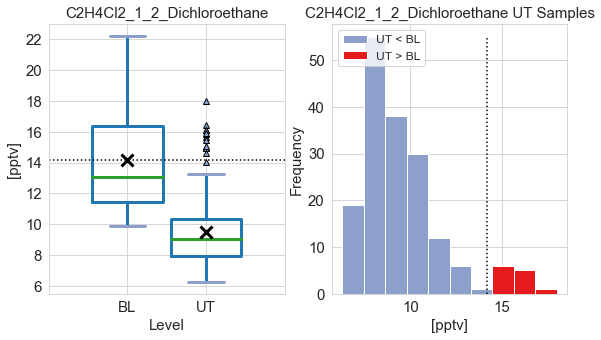

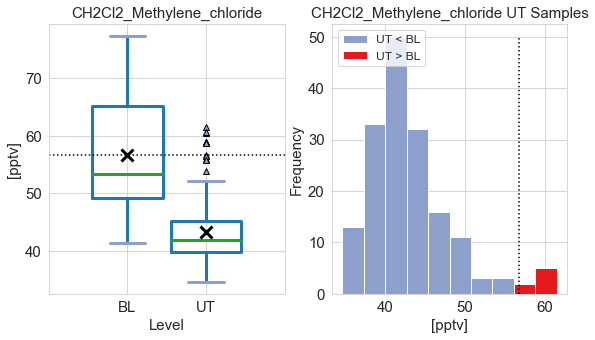

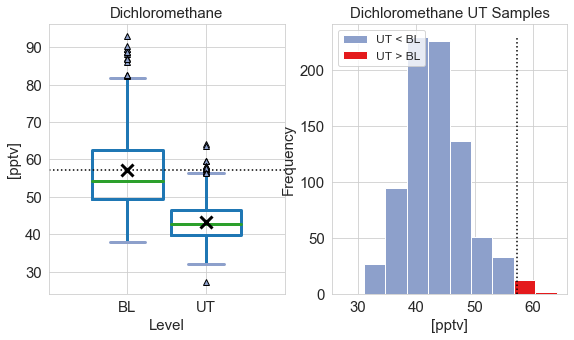

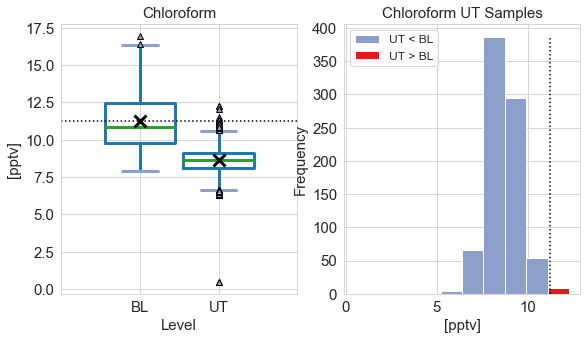

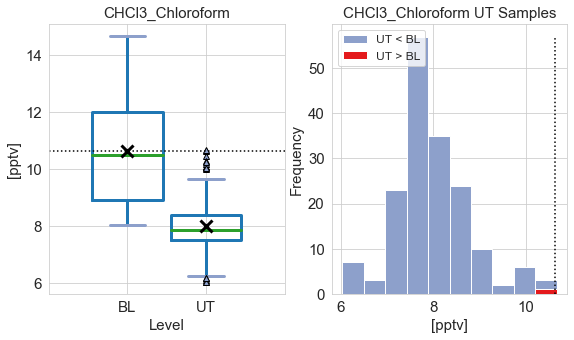

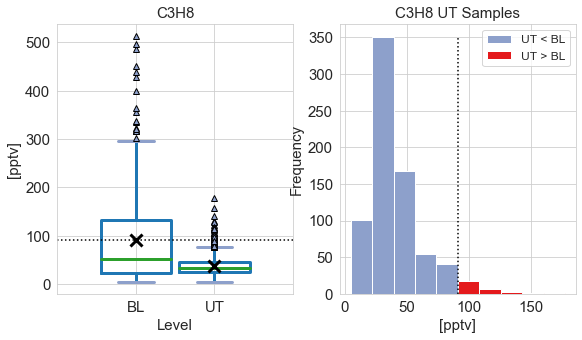

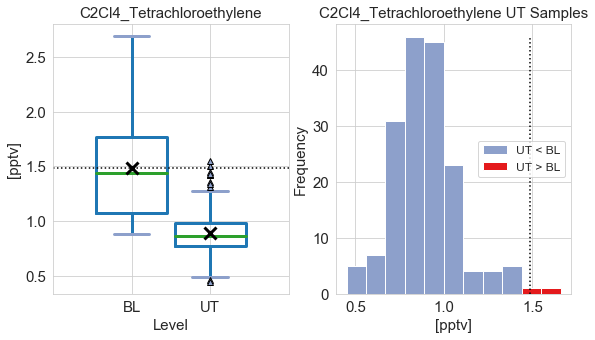

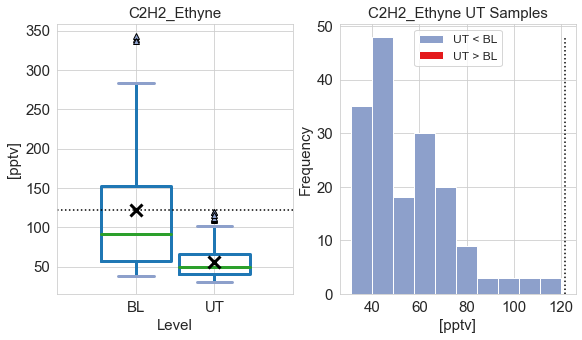

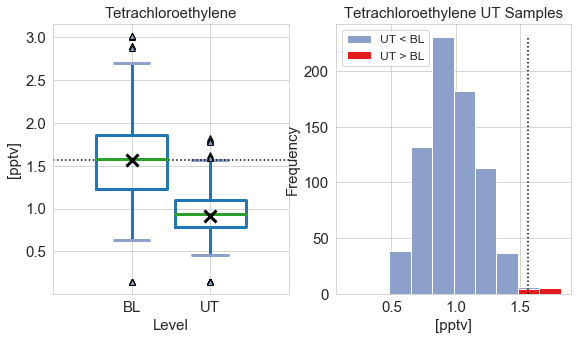

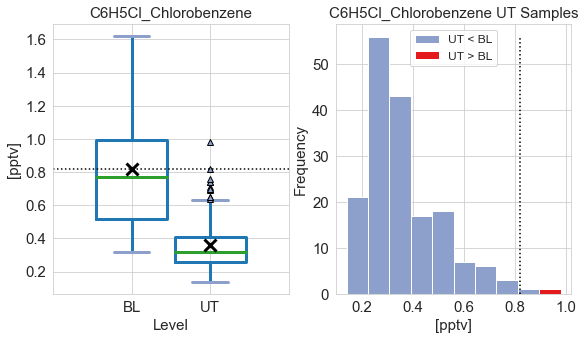

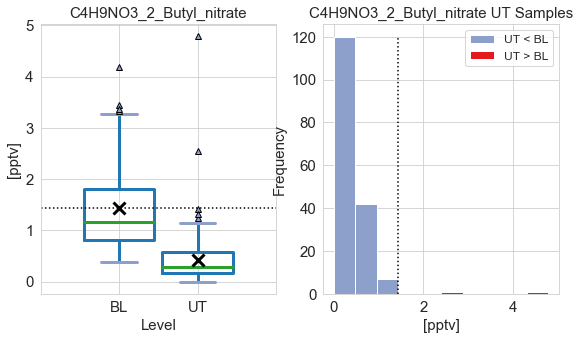

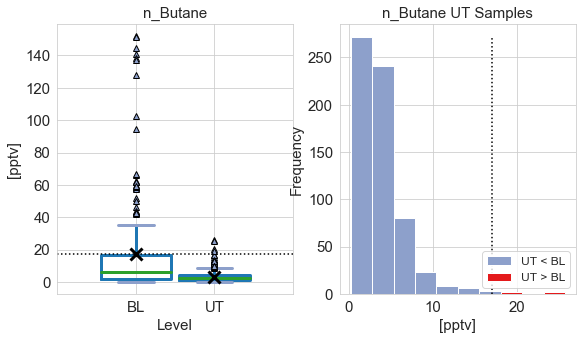

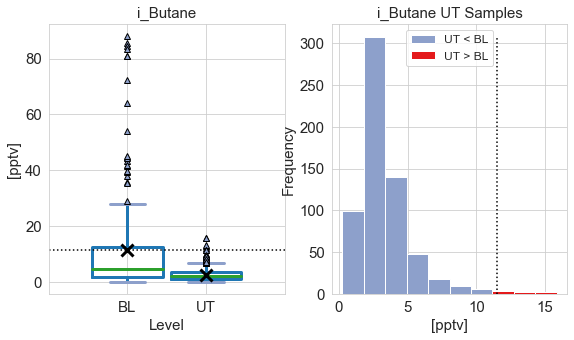

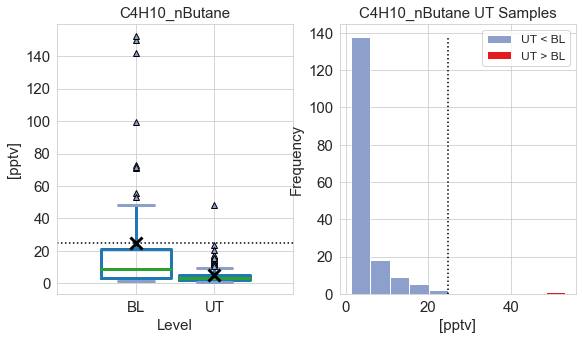

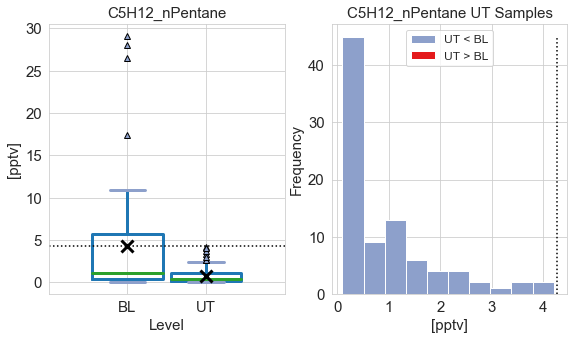

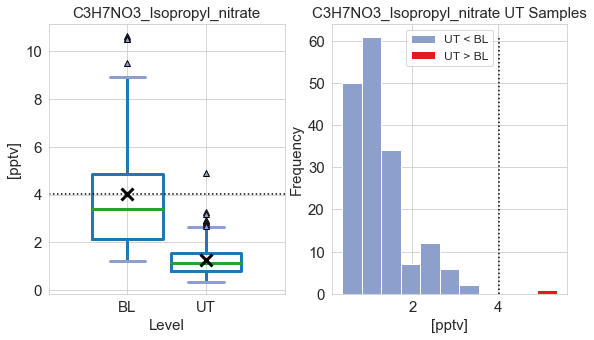

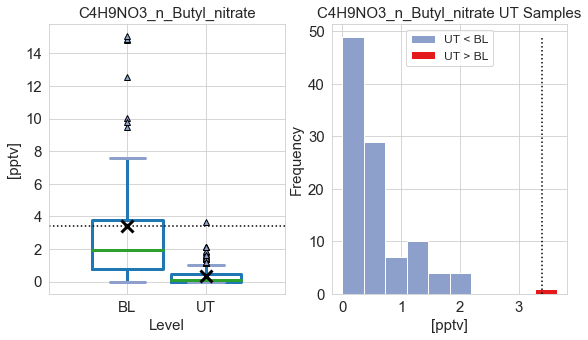

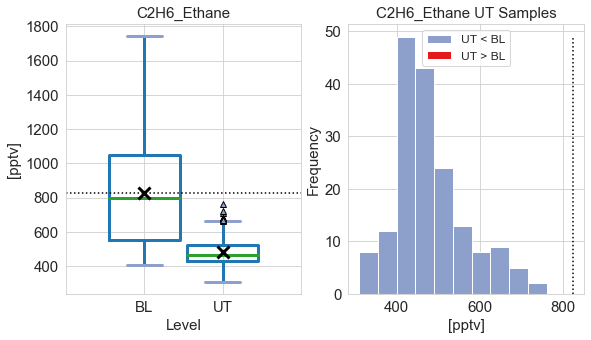

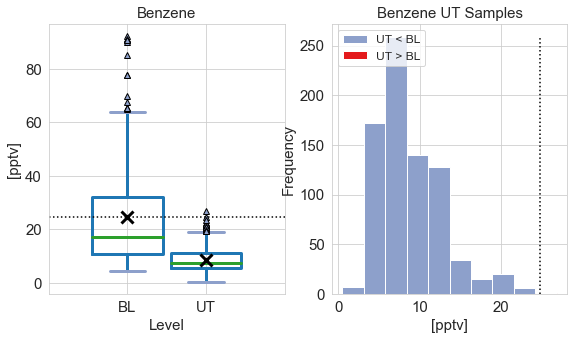

In [633]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, len(trc_gt)):
    trc_idx = i
    plot_utbldist(trc_idx)